In [3]:
import numpy as np 
import pandas as pd 
import os
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import random
import tensorflow_hub as hub

In [3]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.applications import InceptionV3


# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Input, GlobalAveragePooling2D
from keras import backend as K
from keras import applications
from keras.utils import plot_model


import keras_tuner as kt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from tqdm.auto import tqdm
import shutil as sh

import matplotlib.pyplot as plt
from IPython.display import Image, clear_output
%matplotlib inline

import os
import shutil
from xml.etree import ElementTree as ET
import cv2
import xml.etree.ElementTree as ET
from PIL import Image
import glob

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.13.0


c:\Users\juank\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
curr_path = os.getcwd()
img_train_path = os.path.join(curr_path,'images','train')
img_val_path = os.path.join(curr_path,'images','val')
img_test_path = os.path.join(curr_path,'images','test')

label_train_path = os.path.join(curr_path,'labels','train')
label_val_path = os.path.join(curr_path,'labels','val')
label_test_path = os.path.join(curr_path,'labels','test')

In [13]:
curr_path = os.getcwd()
# label_path = os.path.join(curr_path, 'labs')
data_path = ''
img_path = curr_path+'/images'
label_path = curr_path+'/labels'

In [14]:
faceList = os.listdir(img_path)
faceList[:3]

['test', 'train', 'val']

In [15]:
dataSize = len(faceList)
dataSize

715

In [16]:
trainSplit = 0.7
valSplit = 0.1
testSplit = 0.2

imgTrainList = faceList[:int(dataSize*trainSplit)]
imgValList = faceList[int(dataSize*trainSplit):int(dataSize*(trainSplit+valSplit))]
imgTestList = faceList[int(dataSize*(trainSplit+valSplit)):]
len(imgTrainList), len(imgValList), len(imgTestList)

(500, 72, 143)

In [17]:
imgTrainList = os.listdir(img_train_path)
imgValList = os.listdir(img_val_path)
imgTestList = os.listdir(img_test_path)
len(imgTrainList), len(imgValList), len(imgTestList)

(497, 72, 143)

In [20]:
def_size = 300
space = ' '
new_line = '\n'
text = '.txt'
class_id = 0

def change_extension(file):
    basename=os.path.splitext(file)[0]
    filename=basename+text
    return filename

labelTrainList = list(map(change_extension, imgTrainList))
labelValList = list(map(change_extension, imgValList))
labelTestList = list(map(change_extension, imgTestList))
len(labelTrainList), len(labelValList), len(labelTestList)

(497, 72, 143)

In [21]:
imgTrainList[45], labelTrainList[45]

('video_11min_046.jpg', 'video_11min_046.txt')

In [22]:
imgTestList[23], labelTestList[23]

('video_11min_593.jpg', 'video_11min_593.txt')

In [23]:
imgValList[44], labelValList[44] 

('video_11min_542.jpg', 'video_11min_542.txt')

In [24]:
def_size = 300
space = ' '
new_line = '\n'
text = '.txt'
class_id = 0

In [25]:
config_path=os.path.join(curr_path, 'config.yaml')
config_path

'c:\\Users\\juank\\Desktop\\NoDigasMamadas\\config.yaml'

c:\Users\juank\Desktop\NoDigasMamadas\images\train c:\Users\juank\Desktop\NoDigasMamadas\labels\train
c:\Users\juank\Desktop\NoDigasMamadas\labels\train\video_11min_114.txt
c:\Users\juank\Desktop\NoDigasMamadas\images\train c:\Users\juank\Desktop\NoDigasMamadas\labels\train
c:\Users\juank\Desktop\NoDigasMamadas\labels\train\video_11min_191.txt
c:\Users\juank\Desktop\NoDigasMamadas\images\train c:\Users\juank\Desktop\NoDigasMamadas\labels\train
c:\Users\juank\Desktop\NoDigasMamadas\labels\train\video_11min_258.txt
c:\Users\juank\Desktop\NoDigasMamadas\images\train c:\Users\juank\Desktop\NoDigasMamadas\labels\train
c:\Users\juank\Desktop\NoDigasMamadas\labels\train\video_11min_386.txt


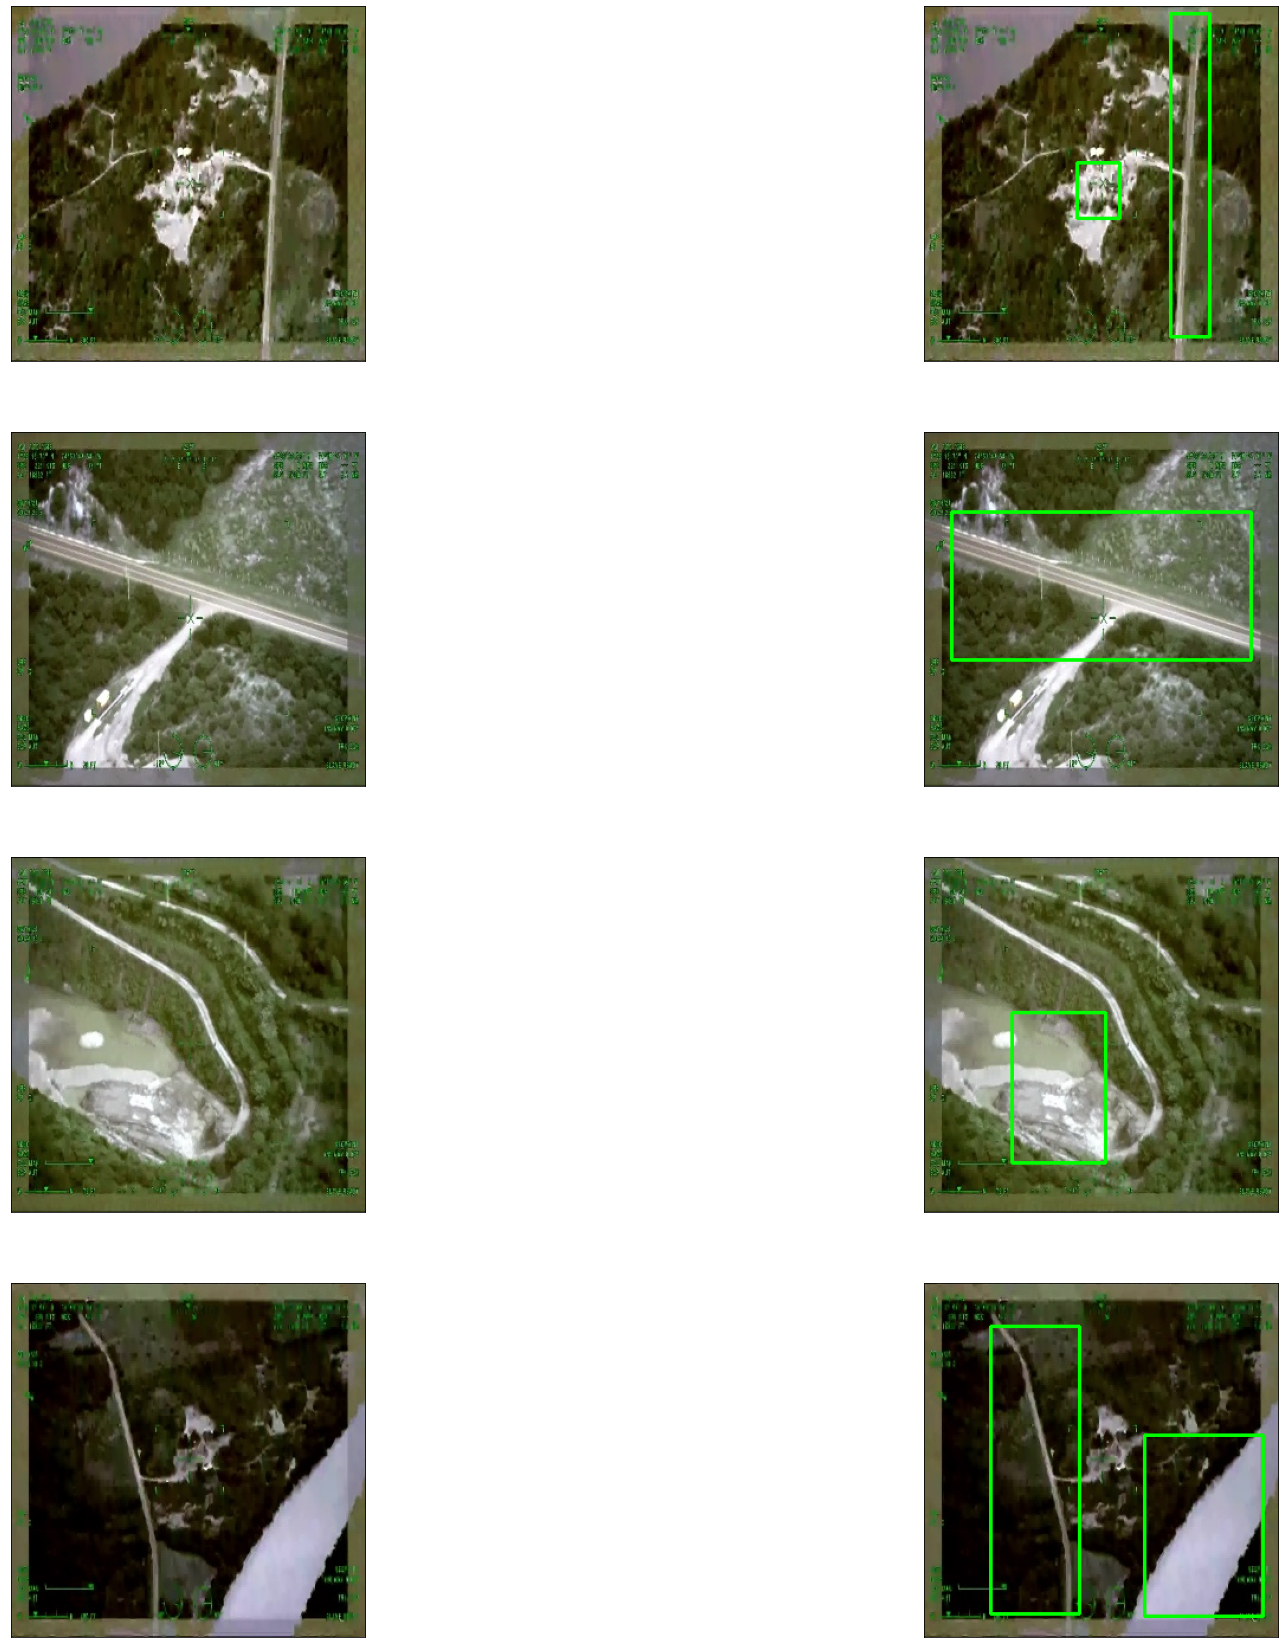

In [26]:
import copy
green = (0,255,0)
def get_bbox_from_label(text_file_path):
    bbox_list=[]
    print(text_file_path)
    with open(text_file_path, "r") as file:
        
        for line in file:
            _,x_centre,y_centre,width,height=line.strip().split(" ")
            x1=(float(x_centre)+(float(width)/2))*def_size
            x0=(float(x_centre)-(float(width)/2))*def_size
            y1=(float(y_centre)+(float(height)/2))*def_size
            y0=(float(y_centre)-(float(height)/2))*def_size

            vertices=np.array([[int(x0), int(y0)], [int(x1), int(y0)],
                               [int(x1),int(y1)], [int(x0),int(y1)]])
#             vertices=vertices.reshape((-1,1,2))
            bbox_list.append(vertices)

    return tuple(bbox_list)

plt.figure(figsize=(30,30))
for i in range(1,8,2):
    k = random.randint(0, len(imgTrainList)-1)
    img_path = os.path.join(img_train_path, imgTrainList[k])
    label_path = os.path.join(label_train_path, labelTrainList[k])
    print(img_train_path,label_train_path)
    bbox = get_bbox_from_label(label_path)
    img = cv2.imread(img_path)
    copy_img = copy.deepcopy(img)
    ax=plt.subplot(4, 2, i)
    plt.imshow(img) # displaying image
    plt.xticks([])
    plt.yticks([])
    cv2.drawContours(copy_img, bbox, -1, green, 2)
    ax=plt.subplot(4, 2, i+1)
    plt.imshow(copy_img) # displaying image with bounding box
    plt.xticks([])
    plt.yticks([])

In [31]:
#Documentation -> https://www.kaggle.com/models/google/mobilenet-v2
m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2",
                   trainable = False)
])

In [32]:
m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
import yaml
with open('config2.yaml', 'r') as file:
    config = yaml.safe_load(file)

In [37]:
train_path = config['train']
val_path = config['val']
test_path = config['test']
num_classes = config['nc']
class_names = config['names']

In [39]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

In [40]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),  # adjust the target size as needed
        batch_size=batch_size,
        class_mode='categorical')

# Flow validation images in batches using the data generators
validation_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=(224, 224),  # adjust the target size as needed
        batch_size=batch_size,
        class_mode='categorical')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [42]:
results=m.fit(train_path, validation_data=val_path, epochs=10)

IndexError: tuple index out of range

In [1]:
results=m.train_on_batch(train_path, validation_data=val_path, epochs=10)

NameError: name 'm' is not defined

# possible implementation
- https://flash10042.medium.com/efficientdet-with-tensorflow-3c5f9df872a2

In [5]:
class BiFPN(tf.keras.layers.Layer):
    """Bidirectional Feature Pyramid Network."""

    def __init__(self,
                 channels=64,
                 depth=3,
                 kernel_size=3,
                 depth_multiplier=1,
                 pooling_strategy='avg',
                 name='BiFPN'):
        super().__init__(name=name)
        """Initialize BiFPN.
        Args:
            channels: an integer representing number of units inside each fusing node
                and convolution layer.
            depth: an integer representing number of BiFPN layers. depth > 0.
            kernel_size: an integer or tuple/list of 2 integers, specifying 
                the height and width of the 2D convolution window.
            depth_multiplier: an integer representing depth multiplier for
                separable convolution layers in BiFPN nodes.
            pooling_strategy: a string representing pooling strategy in BiFPN layers.
                'avg' or 'max'. Otherwise the max pooling will be selected.
            name: a string representing layer name.
        """
        self.depth = depth
        self.channels = channels
        self.pooling_strategy = pooling_strategy

        self.convs_1x1 = [tf.keras.layers.Conv2D(channels,
                                                 1,
                                                 padding='same',
                                                 name=f'1x1_conv_level_{3+i}') for i in range(5)]

        self.bns = [
            tf.keras.layers.BatchNormalization(name=f'bn_level_{i}') for i in range(5)
        ]
        self.act = tf.keras.layers.Activation(tf.nn.silu)

        self.bifpn_layers = [BiFPNLayer(channels=channels,
                                        kernel_size=kernel_size,
                                        depth_multiplier=depth_multiplier,
                                        pooling_strategy=pooling_strategy,
                                        name=f'BiFPN_Layer_{i}') for i in range(depth)]

    def call(self, inputs, training=False):
        assert len(inputs) == 5

        squeezed = [self.convs_1x1[i](inputs[i]) for i in range(5)]
        normalized = [self.bns[i](squeezed[i], training=training) for i in range(5)]
        activated = [self.act(normalized[i]) for i in range(5)]
        feature_maps = self.bifpn_layers[0](activated, training=training)
        for layer in self.bifpn_layers[1:]:
            feature_maps = layer(feature_maps, training=training)

        return feature_maps